# Clasificador de número 7

Vamos a hacer un programa que reciba un número escrito a mano y nos diga si es un 7 o no. Lo primero es tener instaladas las librerías `scikit-learn`, `numpy` y `matplotlib`, si no están instaladas las puedes instalar con:

```
pip3 install scikit-learn numpy matplotlib
```

Luego cargamos el dataset **mnist** de números escritos a mano. Esto lo podemos hacer con una función de la librería `scikit-learn`.

In [1]:
from sklearn.datasets import fetch_openml

mnist = fetch_openml('mnist_784', version=1)

# La variable mnist guarda varias keys con la que podemos acceder al
# distinto contenido del dataset
mnist.keys()

dict_keys(['data', 'target', 'frame', 'categories', 'feature_names', 'target_names', 'DESCR', 'details', 'url'])

Por ahora nos interesan los datos y sus valores (`data` y `target`). Vamos a cargarlos y explicar en un momento lo que significan.

In [2]:
X, y = mnist['data'], mnist['target']

Vamos a ver la dimensión de los datos:

In [3]:
X.shape

(70000, 784)

In [4]:
y.shape

(70000,)

Lo que tenemos aquí son dos colecciones de largo 70000, es decir, tenemos 70000 números escritos a mano. En `X` tenemos las imagenes (que cada una es de $28x28=784$ pixeles) mientras que en y tenemos la respuesta asociada para cada una de las imágenes. Visualicemos el primer elemento del dataset para entender mejor.

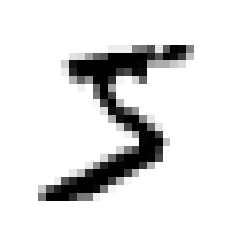

In [8]:
import matplotlib as mpl
import matplotlib.pyplot as plt

some_digit = X[0]

# print(f'El primer elemento es: {some_digit}')

# Ahora lo dejamos de 28x28
some_digit_image = some_digit.reshape(28, 28)

# print(f'Convertimos al elemento en: {some_digit_image}')

plt.imshow(some_digit_image, cmap='binary')
plt.axis("off")
plt.show()

Pareciera que el primer elemento es un 5. Vamos a revisar cual es su valor en el `target`.

In [9]:
y[0]

'5'

Efectivamente el primer elemento está **etiquetado** como un 5, sin embargo está guardado como `string`. Vamos a transformar el arreglo `y` para tener solamente números.

In [11]:
import numpy as np

y = y.astype(np.uint8)

Ahora vamos a dividir el dataset en datos de **entrenamiento** y de **prueba**. Los primeros son con los que entrenamos nuestro modelo y los segundos los datos con los que medimos su desempeño. Normalmente tendriamos que samplear de manera uniforme (hay funciones para esto), sin embargo el dataset ya viene separado: los primeros 60000 elementos son de entrenamiento y los últimos 10000 son de prueba.

In [12]:
X_train, X_test, y_train, y_test = X[:60000], X[60000:], y[:60000], y[60000:]

Y ahora crearemos un nuevo target: necesitamos que para cada elemento en `y` nos aparezca `True` si es un 7 y `False` en caso contrario. Esto se puede hacer muy rápido gracias a la librería `numpy`.

In [15]:
y_train_7 = (y_train == 7)
y_test_7 = (y_test == 7)

Ahora estamos listos! Podemos entrenar un clasificador que reconozca números 7 con nuestros datos. Vamos a partir con con un clasificador `SGD` (Viene de _Stochastic Gradient Descent_). Aquí importaremos el modelo, y lo entrenaremos con la función `fit`.

In [16]:
from sklearn.linear_model import SGDClassifier

sgd_clf = SGDClassifier()
sgd_clf.fit(X_train, y_train_7)

SGDClassifier()

Vamos a probar con un elemento de nuestro dataset de prueba. En la posición 0 del arreglo `y_test_7` tenemos un 7.

In [20]:
y_test_7[0]

True

Vamos a ver como predice nuestro clasificador a este elemento. Para predecir usamos la función `predict`.

In [25]:
# La función predict espera recibir un arreglo de instancias
# En este caso el arreglo tiene una instancia
sgd_clf.predict([X_test[0]])

array([ True])

Ahora una buena pregunta es entender que tan bueno es este clasificador. Eso lo veremos más adelante.